In [174]:
%matplotlib nbagg
from sklearn.datasets import load_iris
import numpy as np
import matplotlib.pyplot as plt
import os
import csv
from os.path import dirname
from os.path import join
from sklearn.tree import DecisionTreeClassifier


In [41]:
class Bunch(dict):
   
    def __init__(self, **kwargs):
        dict.__init__(self, kwargs)

    def __setattr__(self, key, value):
        self[key] = value

    def __getattr__(self, key):
        try:
            return self[key]
        except KeyError:
            raise AttributeError(key)

    def __setstate__(self, state):
        # Bunch pickles generated with scikit-learn 0.16.* have an non
        # empty __dict__. This causes a surprising behaviour when
        # loading these pickles scikit-learn 0.17: reading bunch.key
        # uses __dict__ but assigning to bunch.key use __setattr__ and
        # only changes bunch['key']. More details can be found at:
        # https://github.com/scikit-learn/scikit-learn/issues/6196.
        # Overriding __setstate__ to be a noop has the effect of
        # ignoring the pickled __dict__
        pass

In [178]:
def load_banana(dataset):
    if (dataset == "train"):
        data = 'banana_train.csv'
    else:
        data = 'banana_test.csv'
    module_path = os.path.dirname('__file__')
    with open(join(module_path, 'data', data)) as csv_file:
        data_file = csv.reader(csv_file)
        n_samples = 3500
        n_features = 2
        target_names = ['class1','class2'] 
        data = np.empty((n_samples, n_features))
        target = np.empty((n_samples,), dtype=np.int)

        for i, item in enumerate(data_file):
            data[i] = np.asarray(item[1:], dtype=np.float)
            target[i] = np.asarray(item[0], dtype=np.int)

    return Bunch(data=data, target=target,
                 target_names=target_names,
                 feature_names=['feature1','feature2'])

In [180]:
def fix_labels(dataset):
    for i, item in enumerate(dataset):
        if(item == -1):
            dataset[i] = 0
    return dataset

In [181]:
def shuffle_data(X,y):
    idx = np.arange(X.shape[0])
    np.random.seed(13)
    np.random.shuffle(idx)
    X = X[idx]
    y = y[idx]
    return X,y

In [182]:
def standardize(X):
    mean = X.mean(axis=0)
    std = X.std(axis=0)
    X = (X - mean) / std
    return X

### Problem 2.1 : Visualization of sklearn implementation of decision tree for Banana Dataset

In [183]:
# Parameters
n_classes = 2
plot_colors = 'br'
plot_step = 0.02

# Load data
banana_train = load_banana("train")
banana_test = load_banana("test")

banana_train.target = fix_labels(banana_train.target)
banana_test.target = fix_labels(banana_test.target)

# We only take the two corresponding features
X = banana_train.data
y = banana_train.target

X_test = banana_test.data
y_test = banana_test.target

# Shuffle
X,y = shuffle_data(X,y)
X_test,y_test = shuffle_data(X_test,y_test)

# Standardize
X = standardize(X)
X_test = standardize(X_test)


In [184]:
# Train
clf = DecisionTreeClassifier().fit(X, y)

(380, 382) (380, 382)


<IPython.core.display.Javascript object>


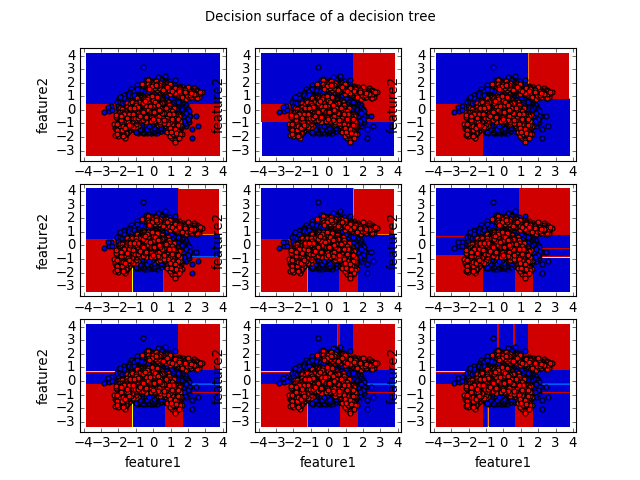

In [185]:
plt.close()
# Plot the decision boundary
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                     np.arange(y_min, y_max, plot_step))

print xx.shape, yy.shape
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
cs = plt.contourf(xx, yy, Z, c=color)

plt.xlabel(banana.feature_names[0])
plt.ylabel(banana.feature_names[1])
plt.axis("tight")

# Plot the training points
for i, color in zip(range(n_classes), plot_colors):
    idx = np.where(y == i)
    plt.scatter(X[idx, 0], X[idx, 1], c=color, label=banana.target_names[i],
                cmap=plt.cm.Paired)

plt.axis("tight")

plt.suptitle("Decision surface of a decision tree")
plt.legend()
plt.show()

In [162]:
plt.close()

### Problem 2.2 : Observations by changing the depth of the decision trees

<IPython.core.display.Javascript object>


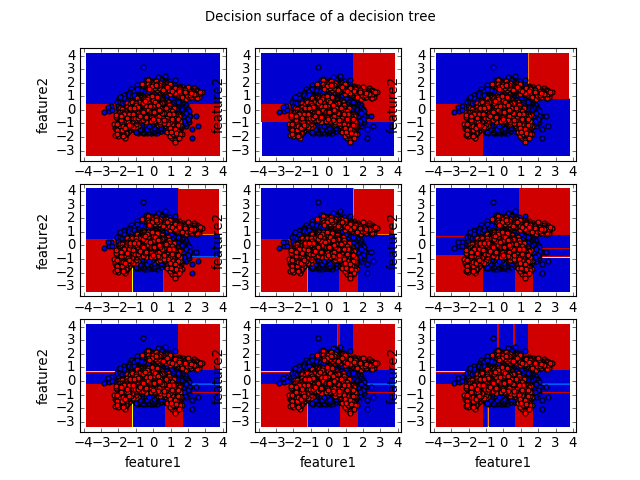

In [188]:
for i in range(1,10):
    clf = DecisionTreeClassifier(max_depth = i).fit(X, y)
    plt.subplot(3, 3, i)
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    cs = plt.contourf(xx, yy, Z, c=color)

    plt.xlabel(banana.feature_names[0])
    plt.ylabel(banana.feature_names[1])
    plt.axis("tight")

    # Plot the training points
    for i, color in zip(range(n_classes), plot_colors):
        idx = np.where(y == i)
        plt.scatter(X[idx, 0], X[idx, 1], c=color,
                    cmap=plt.cm.Paired)

    plt.axis("tight")

    plt.suptitle("Decision surface of a decision tree")
    plt.legend()
    plt.show()



#### Observations 

* The classification gets better as we increase the depth of the tree, as the leaf nodes get purer as we increase the number of split conditions.

### Problem 2.3 : Training error Vs Test Error as a function of depth

<IPython.core.display.Javascript object>


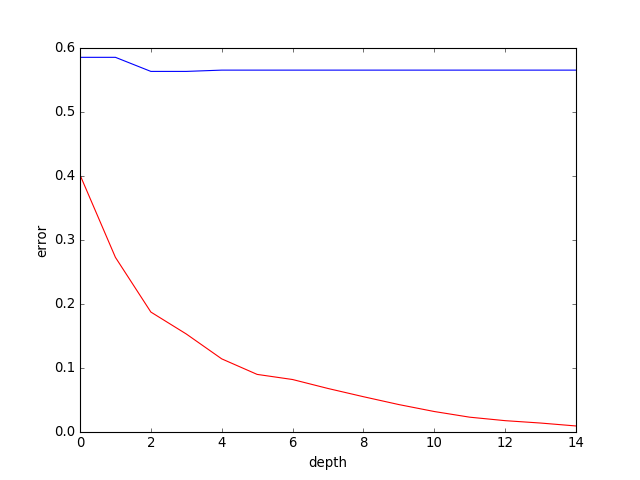

In [220]:
depth = 15
training_score = np.empty(depth)
test_score = np.empty(depth)
for i in range(1,depth+1):
    clf = DecisionTreeClassifier(max_depth = i).fit(X, y)
    training_score[i-1] = 1 - clf.score(X,y)
    test_score[i-1] = 1 - clf.score(X_test,y_test)


plt.close()
plt.xlabel("depth")
plt.ylabel("error")
plt.plot(training_score,'r')
plt.plot(test_score,'b')
    
    

### Observation: 
* As the depth increases the training error decreases to zero.
* As the depth increases the test error decreases to a point but starts increases after a sweet spot. Test error is least when depth = 2

### Problem 2.4: Experimentation with other hyper-parameters

[ 0.58542857  0.58542857  0.56342857  0.56342857  0.56342857  0.56342857
  0.56342857  0.56342857  0.56342857  0.56342857]


<IPython.core.display.Javascript object>


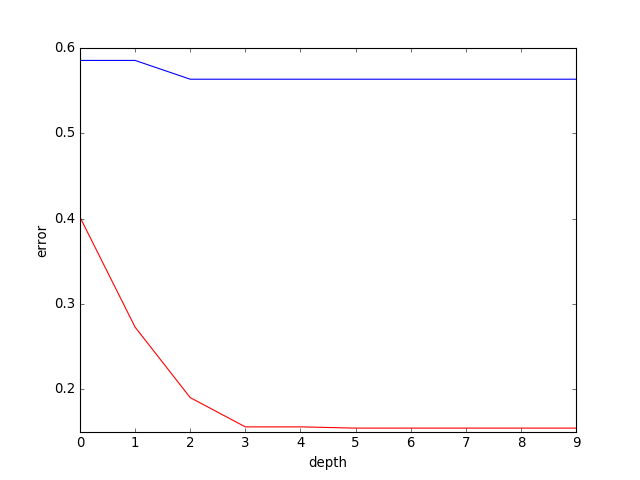

In [239]:
depth = 10
training_score = np.empty(depth)
test_score = np.empty(depth)
for i in range(1,depth+1):
    clf = DecisionTreeClassifier(max_depth = i,min_samples_split=500).fit(X, y)
    training_score[i-1] = 1 - clf.score(X,y)
    test_score[i-1] = 1 - clf.score(X_test,y_test)
    
print test_score

plt.close()
plt.xlabel("depth")
plt.ylabel("error")
plt.plot(training_score,'r')
plt.plot(test_score,'b')

### Observation

* Combination with max-depth=3, min_samples_split = 500 stabilizes generalization error to 0.5634 for further depths

[ 0.58542857  0.58542857  0.55942857  0.55942857  0.55942857  0.55942857
  0.55942857  0.55942857  0.55942857  0.55942857]


<IPython.core.display.Javascript object>


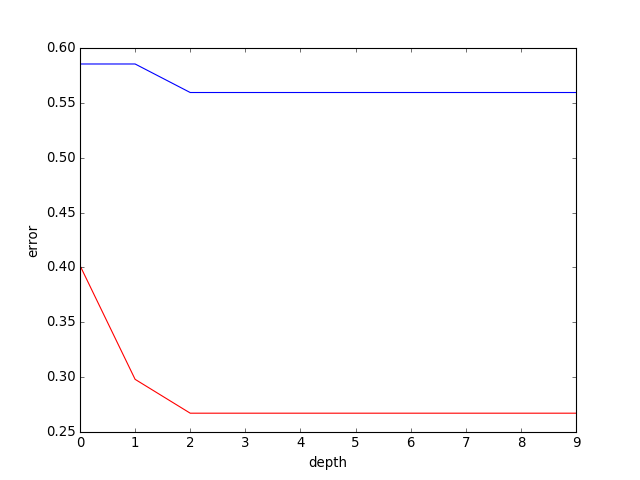

In [248]:
depth = 10
training_score = np.empty(depth)
test_score = np.empty(depth)
for i in range(1,depth+1):
    clf = DecisionTreeClassifier(max_depth = i,min_samples_leaf=400).fit(X, y)
    training_score[i-1] = 1 - clf.score(X,y)
    test_score[i-1] = 1 - clf.score(X_test,y_test)
    
print test_score

plt.close()
plt.xlabel("depth")
plt.ylabel("error")
plt.plot(training_score,'r')
plt.plot(test_score,'b')

### Problem 3.1 Adaboost

In [ ]:
clf = 